In [2]:
from torchvision.ops import batched_nms
%load_ext autoreload
%autoreload 2

import sys
import os
import matplotlib.patches as patches
sys.path.append(".")

from Models.splinedist import *
import pytorch_lightning as pl
import torch
from Datasets.CISD import *
from Datasets.DSB18 import * 
from torchvision import io
import glob

In [3]:
# # pl.seed_everything(47)
data = CISD_datamodule(path="Datasets/CISD/CISD.json", root="Datasets/CISD/center_slice", contourSize=500)
batch_x, batch_y = next(iter(data.val_dataloader()))
showBatch((batch_x, batch_y))
# !pip install shapely

/master/home/mbenimam/.local/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(

KeyboardInterrupt



# Evaluation on the Dataset

In [3]:

device = "cuda:0"
# torch.cuda.empty_cache()
model = SplineDist.load_from_checkpoint(
    checkpoint_path="Experiments/Models_final2/weights/splineDist-CISD4-epoch=86-loss_val=0.08.ckpt")
model = model.to(device)
# model.shifts = model.shifts.to(device)

# data2 = data.trainDataset
# data = Nuclie_data("../Datasets/DSB18/train")
threshold = 0.5
nms_threshold = 0.4
MAX_CONTOUR_SIZE = 500

# model.B3M = getBsplineMatrix(numSamples=MAX_CONTOUR_SIZE,
#                             degree=3,
#                             numControlPoints=model.B3M.shape[1]).float().to(device)

MAX_INSTANCES = 1000

# idxs = np.random.randint(0, len(data2), 30)
# for i, idx in enumerate(idxs):
    
#     img, target = data2[i]
#     (targetObjectProbas, targetOverlapProbas, targetContours, mask) = target.values()

#     img = img.unsqueeze(0).to(device)
#     targetObjectProbas = targetObjectProbas.unsqueeze(0).to(device)
#     targetOverlapProbas = targetOverlapProbas.unsqueeze(0).to(device)
#     targetContours = targetContours.to(device)

#     (objectProbas, angles, distances, controlPoints, objectOverlap) = model(img)
#     objectProbas = torch.sigmoid(objectProbas)
    
#     contours = getContourSamples(controlPoints, model.B3M).permute(1, 2, 3, 0, 4)
#     contours = contours.reshape(-1, MAX_CONTOUR_SIZE, 2)
#     # loss = computeContourLoss(objectProbas, contours, targetObjectProbas, targetContours)
    
#     xmin = torch.amin(contours[:, :, 1], dim=-1) 
#     xmax = torch.amax(contours[:, :, 1], dim=-1)
#     ymin = torch.amin(contours[:, :, 0], dim=-1)
#     ymax = torch.amax(contours[:, :, 0], dim=-1)

#     bboxes = torch.stack([xmin, ymin, xmax, ymax], -1)

#     scores = objectProbas[0].reshape(256*256)

#     bboxes = bboxes[scores>threshold]
#     scores2 = scores[scores>threshold]

#     selectedIds = batched_nms(bboxes, scores2, torch.ones(len(scores2)), iou_threshold=nms_threshold)

#     bboxes = bboxes.detach().cpu().numpy()
#     selectedIds = selectedIds.detach().cpu().numpy()

#     rects = bboxes[selectedIds]

#     image = np.ones((256,256,3), np.uint8)*255
#     image2 = np.uint8(denormalize(img[0].detach().cpu()).numpy().transpose(1, 2, 0)*255)
    
#     clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# #     image2 = clahe.apply(image2)
#     img_yuv = cv2.cvtColor(image2, cv2.COLOR_RGB2YUV)

#     # equalize the histogram of the Y channel
#     img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0])

#     # convert the YUV image back to RGB format
#     image2 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    
# #     image2 = cv2.equalizeHist(image2)
#     ctrs = contours[scores>threshold][selectedIds].detach().cpu().numpy()



#     fig, (ax3, ax4) = plt.subplots(
#                 1, 2, figsize=(15, 7))


#     ax3.set_title("Object Probabilities")
#     # print(objectProbas.min(), objectProbas.max(), objectProbas.ptp())
#     ax3.imshow(objectProbas[0, 0].detach().cpu(), cmap='gnuplot2')
#     # plt.subplot(1,4,4)
#     ax4.set_title("Object Instances")
#     # instances, colors = getInstancesImageFromContours(objectContours)
#     #ax4.imshow(denormalize(img[0]).cpu().numpy().transpose(1, 2, 0))
#     ax4.imshow(image2)
#     # ax4.imshow(instances, alpha=0.3)
#     colors = [ list(map(lambda x: x/255, getRandomColor())) for j in range(len(contours))]

#     for j, ct in enumerate(ctrs):
#         ax4.fill(ctrs[j][:, 0], ctrs[j][:, 1], color=colors[j], alpha=0.3)
#         ax4.plot(ctrs[j][:, 0], ctrs[j][:, 1],color=colors[j], linewidth=2, linestyle='dashed')

#     fig.tight_layout()
#     plt.show()



/master/home/mbenimam/.local/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


('cuda:0',) {}


# Evaluation on costum images

('cuda:0',) {}
inferenceCISD/0231_K_00990.jpg
20697


100%|█████████████████████████████████████| 20697/20697 [08:54<00:00, 38.73it/s]


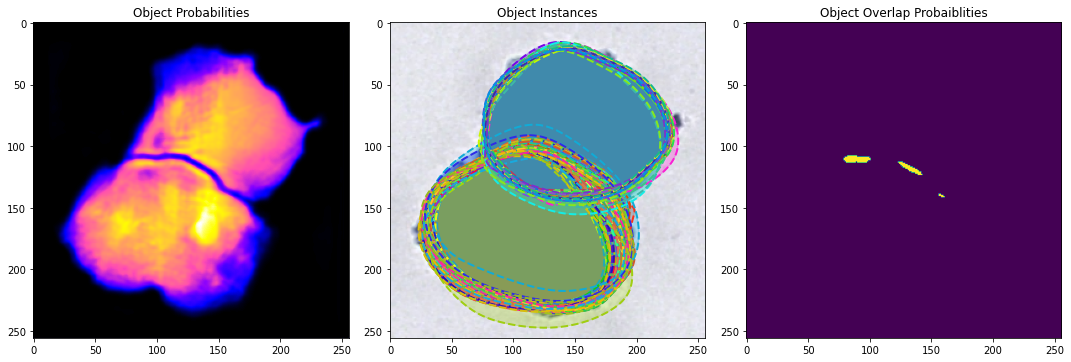

/master/home/mbenimam/.local/lib/python3.8/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


inferenceCISD/0231_K_00965.jpg
15194


100%|█████████████████████████████████████| 15194/15194 [06:54<00:00, 36.63it/s]


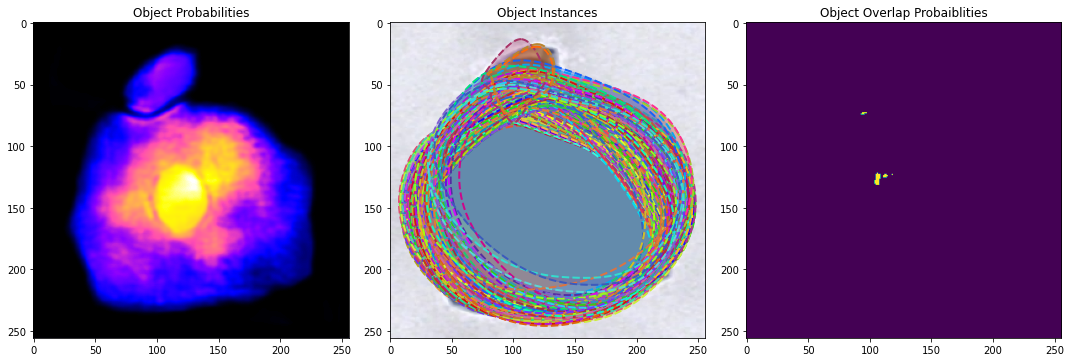

/master/home/mbenimam/.local/lib/python3.8/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


inferenceCISD/0231_K_00957.jpg
17238


 32%|████████████                          | 5459/17238 [01:48<03:54, 50.32it/s]


KeyboardInterrupt: 

In [20]:
transforms = get_transforms(0.5, 0.5)
device = "cuda:0"
model = model.to(device)
MAX_CONTOUR_SIZE = 500
threshold = 0.3
nms_threshold = 0.4
MAX_CONTOUR_SIZE = 500
for image in glob.glob("inferenceCISD/*.jpg"):
    print(image)
    img = io.read_image(image, io.ImageReadMode.RGB).float()/255
    img = transforms(img).unsqueeze(0)
    img = img.to(device)
    model.eval()

    with torch.no_grad():
        (objectProbas, angles, distances, controlPoints, objectOverlap) = model(img)
        objectProbas = torch.sigmoid(objectProbas)
        objectOverlap = torch.sigmoid(objectOverlap)
        contours = getContourSamples(controlPoints, model.B3M).permute(1, 2, 3, 0, 4)
        contours = contours.reshape(-1, MAX_CONTOUR_SIZE, 2)

#         xmin = torch.amin(contours[:, :, 1], dim=-1) 
#         xmax = torch.amax(contours[:, :, 1], dim=-1)
#         ymin = torch.amin(contours[:, :, 0], dim=-1)
#         ymax = torch.amax(contours[:, :, 0], dim=-1)

#         bboxes = torch.stack([xmin, ymin, xmax, ymax], -1)

#         scores = objectProbas[0].reshape(256*256)

#         bboxes = bboxes[scores>threshold]
#         scores2 = scores[scores>threshold]

#         selectedIds = batched_nms(bboxes, scores2, torch.ones(len(scores2)), iou_threshold=nms_threshold)

#         bboxes = bboxes.detach().cpu().numpy()
#         selectedIds = selectedIds.detach().cpu().numpy()

#         rects = bboxes[selectedIds]

        # polygon IOU

        scores = objectProbas[0].flatten(1).cpu().detach().numpy()
        sortedInstances = np.argsort(scores, axis=1).copy()

        til = [np.searchsorted(scores[0, sortedInstances[0]], threshold)]

        contours2 = [contours[til[0]:]]
#         print(til)
        print(len(contours2[0]))
        postProcessed = nonMaximumSuppresion(scores[0, sortedInstances[0, til[0]:]],
                                            contours2[0],
                                            threshold,
                                            nms_threshold)

        contoursSelected, selectedIds = postProcessed
        selectedIds = np.array(selectedIds)
        
        
        # end of the non maximum suppression
        
        
        
        image = np.ones((256,256,3), np.uint8)*255
        image2 = np.uint8(denormalize(img[0].detach().cpu()).numpy().transpose(1, 2, 0)*255)
        
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
   
    
    #     image2 = clahe.apply(image2)
        img_yuv = cv2.cvtColor(image2, cv2.COLOR_RGB2YUV)

        # equalize the histogram of the Y channel
        img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0])

        # convert the YUV image back to RGB format
        image2 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
        
    #     image2 = cv2.equalizeHist(image2)
        ctrs = contours[scores>threshold][selectedIds].detach().cpu().numpy()

        fig, (ax2, ax3, ax4) = plt.subplots(
                    1, 3, figsize=(15, 7))
        
        ax4.set_title("Object Overlap Probaiblities")
        ax4.imshow(objectOverlap[0, 0].detach().cpu()>0.2)
        
        ax2.set_title("Object Probabilities")
        # print(objectProbas.min(), objectProbas.max(), objectProbas.ptp())
        ax2.imshow(objectProbas[0, 0].detach().cpu(), cmap='gnuplot2')
        # plt.subplot(1,4,4)
        ax3.set_title("Object Instances")
        # instances, colors = getInstancesImageFromContours(objectContours)
        #ax4.imshow(denormalize(img[0]).cpu().numpy().transpose(1, 2, 0))
        ax3.imshow(image2)
        # ax4.imshow(instances, alpha=0.3)
        colors = [ list(map(lambda x: x/255, getRandomColor())) for j in range(len(contours))]

        for j, ct in enumerate(ctrs):
            ax3.fill(ctrs[j][:, 0], ctrs[j][:, 1], color=colors[j], alpha=0.3)
            ax3.plot(ctrs[j][:, 0], ctrs[j][:, 1],color=colors[j], linewidth=2, linestyle='dashed')

        fig.tight_layout()
        plt.show()
            


In [22]:
model.device

device(type='cpu')

In [31]:
torch.cuda.get_device_name(0)

'NVIDIA TITAN Xp'